In [191]:
import numpy as np
import matplotlib.pyplot as plt

# Local application/library specific imports
import importlib
import project_functions as pf
import tqdm
import h5py

# Reloading the local module 
importlib.reload(pf)

<module 'project_functions' from 'c:\\Users\\lissn\\Thesis\\code\\project_functions.py'>

In [192]:
from matplotlib import colors    
from matplotlib.colors import BoundaryNorm

# Use the function to create the colormap
cmap = pf.read_rgb_file('radar.rgb')
boundaries = np.linspace(0, 75, 16)
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=True)

In [193]:
file_paths[53:59]#[5::6][8:14]

['C:/Users/lissn/Thesis/data/radar/2023/2023/11/22/dk.com.202311220850.500_max.h5',
 'C:/Users/lissn/Thesis/data/radar/2023/2023/11/22/dk.com.202311220900.500_max.h5',
 'C:/Users/lissn/Thesis/data/radar/2023/2023/11/22/dk.com.202311220910.500_max.h5',
 'C:/Users/lissn/Thesis/data/radar/2023/2023/11/22/dk.com.202311220920.500_max.h5',
 'C:/Users/lissn/Thesis/data/radar/2023/2023/11/22/dk.com.202311220930.500_max.h5',
 'C:/Users/lissn/Thesis/data/radar/2023/2023/11/22/dk.com.202311220940.500_max.h5']

In [194]:
file_paths[5::6][8:14]

['C:/Users/lissn/Thesis/data/radar/2023/2023/11/22/dk.com.202311220850.500_max.h5',
 'C:/Users/lissn/Thesis/data/radar/2023/2023/11/22/dk.com.202311220950.500_max.h5',
 'C:/Users/lissn/Thesis/data/radar/2023/2023/11/22/dk.com.202311221050.500_max.h5',
 'C:/Users/lissn/Thesis/data/radar/2023/2023/11/22/dk.com.202311221150.500_max.h5',
 'C:/Users/lissn/Thesis/data/radar/2023/2023/11/22/dk.com.202311221250.500_max.h5',
 'C:/Users/lissn/Thesis/data/radar/2023/2023/11/22/dk.com.202311221350.500_max.h5']

<function matplotlib.pyplot.show(close=None, block=None)>

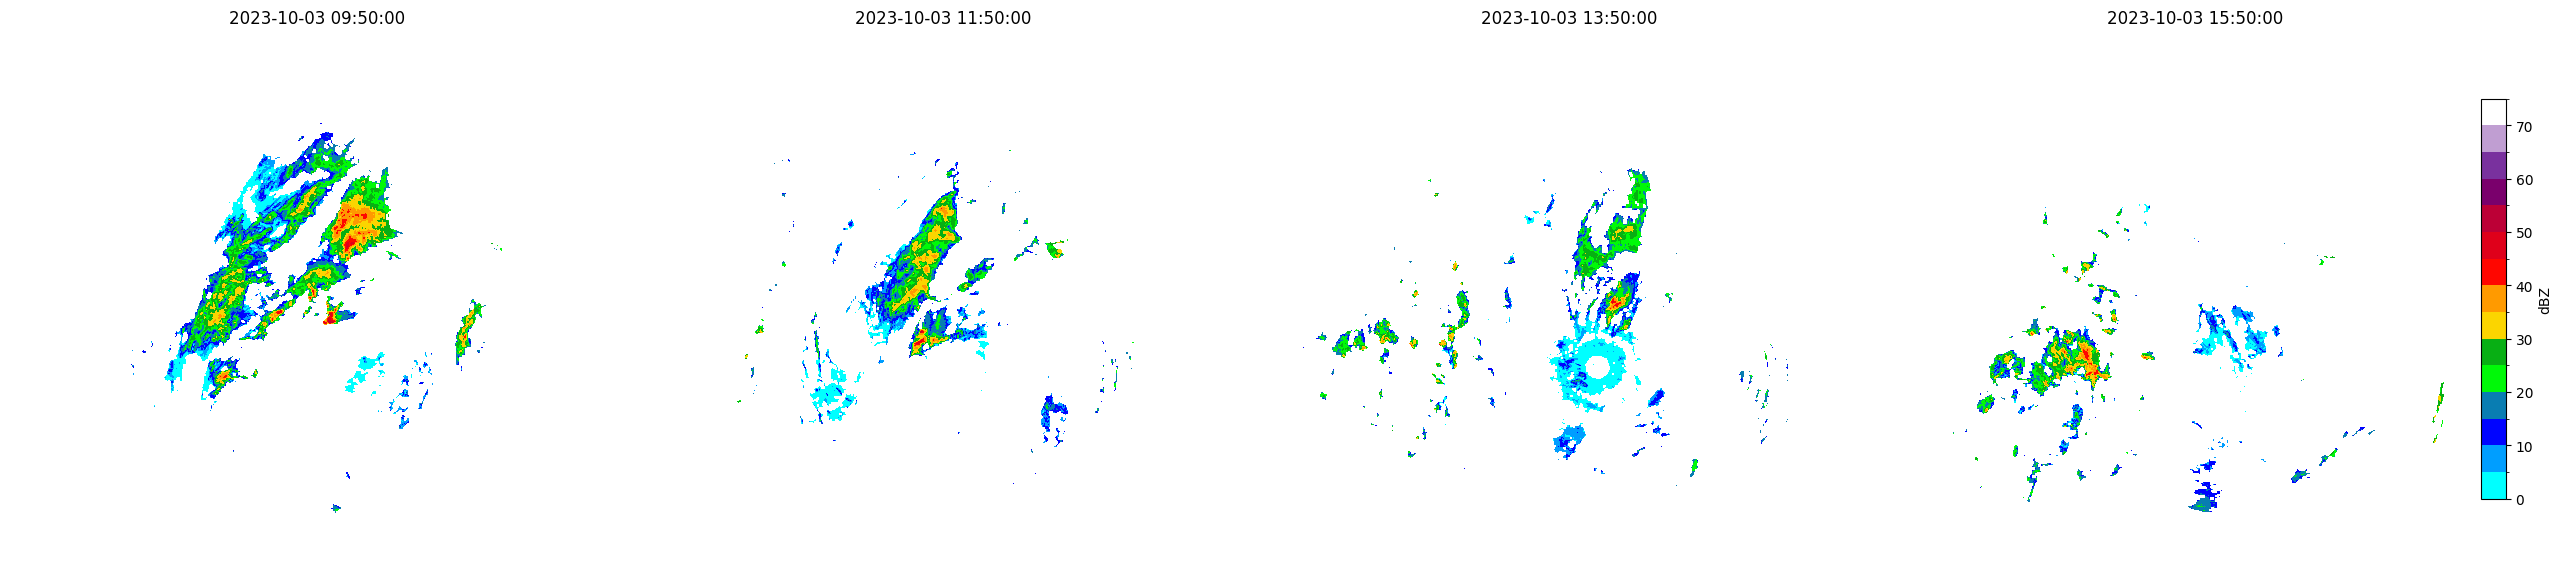

In [195]:
# Generate file paths
data_dir = "C:/Users/lissn/Thesis/data/radar"
start_date = '20231003'  # Start date
end_date = '20231201'    # End date
file_paths = pf.generate_file_paths(start_date, end_date, data_dir)
file_paths_conv = file_paths[11::12][4:10] # [53:59]#

cols = 4
rows = 1
fig, axs = plt.subplots(rows, cols, figsize=(25, 8), constrained_layout=True)
axs = axs.flatten()  
i = 0

imgC = np.zeros((1728, 1984, len(file_paths_conv)))
imgC_dBZ = np.zeros((1728, 1984, len(file_paths_conv)))

for file_path in file_paths_conv:
    try:
        with h5py.File(file_path, 'r') as f:
            raw_data = f['dataset1/data1/data'][()]
            raw_data_array = np.array(raw_data).astype(float)
            raw_data_array[raw_data_array == 255] = np.nan # values of 255 in raw data are actually NaN
            zero_values = raw_data_array == 0 # store where zero values are located in the grid, as these are changed by the transformation below
            gain = 0.5
            offset = -32
            dbz_data = offset + gain * raw_data_array # convert to dBZ
            dbz_data[zero_values] = np.nan
            im = axs[i].imshow(dbz_data, cmap=cmap, norm=norm) 
            axs[i].set_title(pf.extract_timestamp_from_path(file_path), fontsize = 12)  
            axs[i].axis('off')

            imgC[:,:,i] = raw_data_array
            imgC_dBZ[:,:,i] = dbz_data
            
            i = i+1
        if i == cols*rows:
            break  
    except:
        print(f"Error reading file: {file_path}")
        continue

# Add a color bar
cbar_ax = fig.add_axes([0.99, 0.25, 0.01, 0.5])  # x, y, width, height
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('dBZ')

#plt.tight_layout()
plt.savefig('C:/Users/lissn/Thesis/figures/example_convection.png', bbox_inches='tight', dpi = 300)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

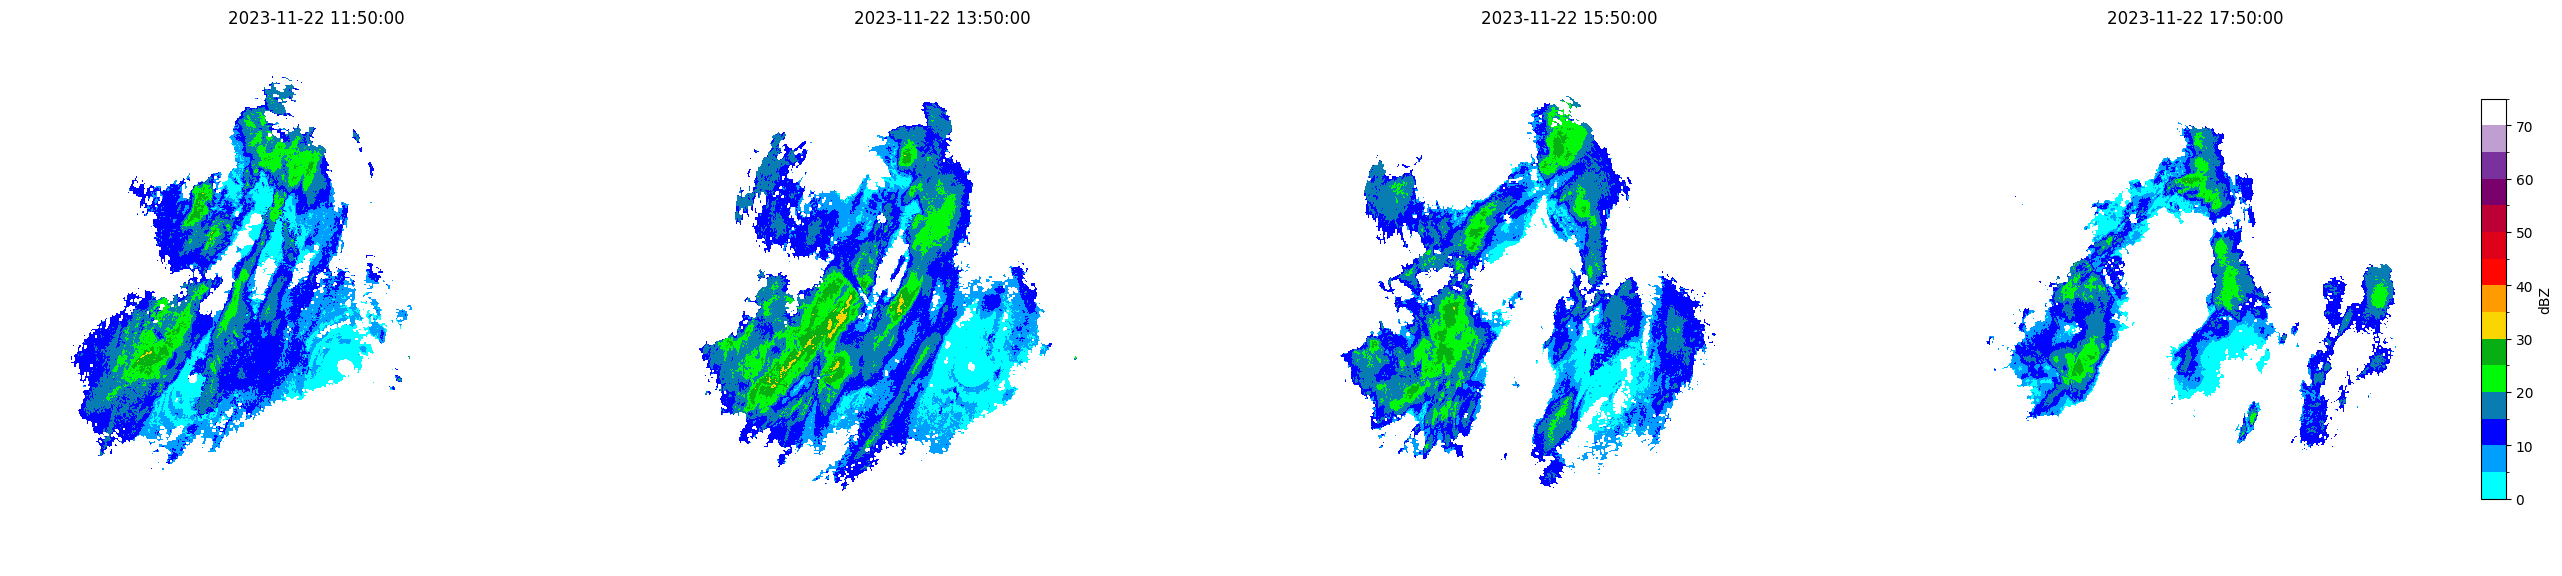

In [196]:
data_dir = "C:/Users/lissn/Thesis/data/radar"
start_date = '20231122'  # Start date
end_date = '20231231'    # End date
file_paths = pf.generate_file_paths(start_date, end_date, data_dir)
file_paths_stratiform = file_paths[11::12][5:9] #[81:85]#

cols = 4
rows = 1
fig, axs = plt.subplots(rows, cols, figsize=(25, 8), constrained_layout=True)
axs = axs.flatten()  
i = 0

imgS = np.zeros((1728, 1984, len(file_paths_stratiform)))
imgS_dBZ = np.zeros((1728, 1984, len(file_paths_stratiform)))

for file_path in file_paths_stratiform:
    try:
        with h5py.File(file_path, 'r') as f:
            raw_data = f['dataset1/data1/data'][()]
            raw_data_array = np.array(raw_data).astype(float)
            raw_data_array[raw_data_array == 255] = np.nan # values of 255 in raw data are actually NaN
            zero_values = raw_data_array == 0 # store where zero values are located in the grid, as these are changed by the transformation below
            gain = 0.5
            offset = -32
            dbz_data = offset + gain * raw_data_array # convert to dBZ
            dbz_data[zero_values] = np.nan
            axs[i].imshow(dbz_data, cmap=cmap, norm = norm ) 
            axs[i].set_title(pf.extract_timestamp_from_path(file_path), fontsize = 12)  
            axs[i].axis('off')

            imgS[:,:,i] = raw_data_array
            imgS_dBZ[:,:,i] = dbz_data

            i = i+1
        if i == cols*rows:
            break  
    except:
        print(f"Error reading file: {file_path}")
        continue

# Add a color bar
cbar_ax = fig.add_axes([0.99, 0.25, 0.01, 0.5])  # x, y, width, height
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('dBZ')

#plt.tight_layout()
plt.savefig('C:/Users/lissn/Thesis/figures/example_stratiform.png', bbox_inches='tight', dpi = 300)
plt.show

## Wasserstein Distance

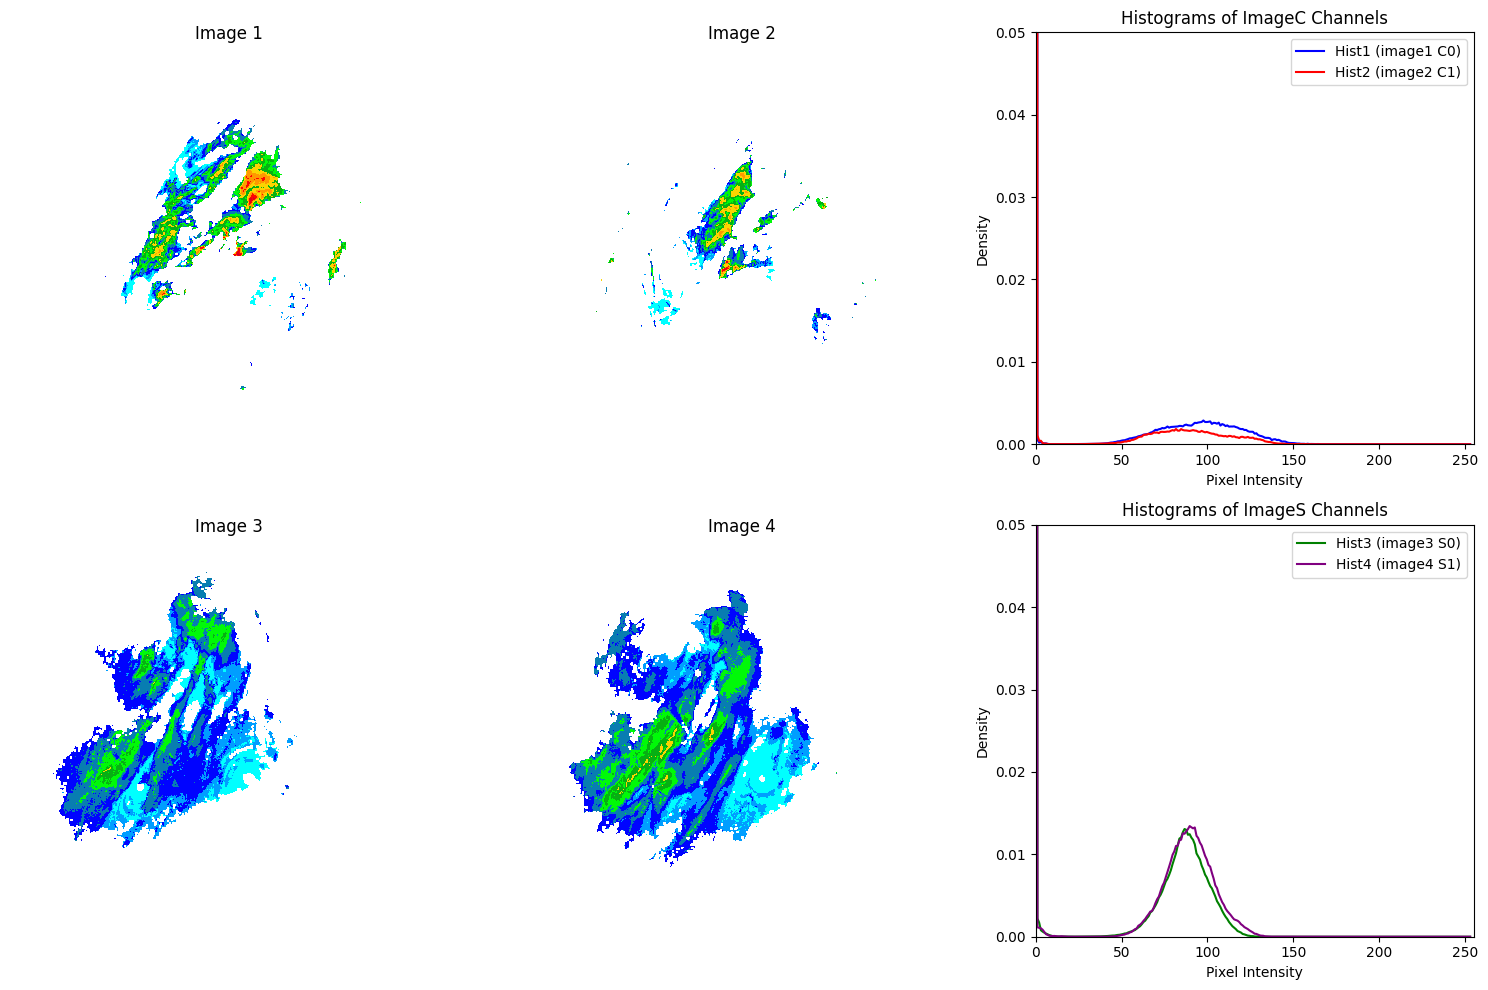

In [197]:
image1 = imgC[:,:,0]
image2 = imgC[:,:,1]
image3 = imgS[:,:,0]
image4 = imgS[:,:,1]

# Set pixel values of 1 to NaN
#image1[image1 == 0] = np.nan
#image2[image2 == 0] = np.nan
#image3[image3 == 0] = np.nan
#image4[image4 == 0] = np.nan

# Calculate histograms ignoring NaN values
hist1, bins1 = np.histogram(image1, bins=255, range=[0, 254], density=True)
hist2, bins2 = np.histogram(image2, bins=255, range=[0, 254], density=True)
hist3, bins3 = np.histogram(image3, bins=255, range=[0, 254], density=True)
hist4, bins4 = np.histogram(image4, bins=255, range=[0, 254], density=True)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Plotting the first row images
axes[0, 0].imshow(imgC_dBZ[:,:,0], cmap=cmap, norm=norm)
axes[0, 0].set_title('Image 1')
axes[0, 0].axis('off')  # Hide axis

axes[0, 1].imshow(imgC_dBZ[:,:,1], cmap=cmap, norm=norm)
axes[0, 1].set_title('Image 2')
axes[0, 1].axis('off')  # Hide axis

axes[0,2].plot(bins1[:-1], hist1, label='Hist1 (image1 C0)', color='blue')
axes[0,2].plot(bins2[:-1], hist2, label='Hist2 (image2 C1)', color='red')
axes[0,2].set_title('Histograms of ImageC Channels')
axes[0,2].set_xlabel('Pixel Intensity')
axes[0,2].set_ylabel('Density')
axes[0,2].legend()
axes[0,2].set_xlim([0, 255])
axes[0,2].set_ylim([0, 0.05])

# Plotting the second row images
axes[1, 0].imshow(imgS_dBZ[:,:,0], cmap=cmap, norm=norm)
axes[1, 0].set_title('Image 3')
axes[1, 0].axis('off')  # Hide axis

axes[1, 1].imshow(imgS_dBZ[:,:,1], cmap=cmap, norm=norm)
axes[1, 1].set_title('Image 4')
axes[1, 1].axis('off')  # Hide axis

axes[1,2].plot(bins3[:-1], hist3, label='Hist3 (image3 S0)', color='green')
axes[1,2].plot(bins4[:-1], hist4, label='Hist4 (image4 S1)', color='purple')
axes[1,2].set_title('Histograms of ImageS Channels')
axes[1,2].set_xlabel('Pixel Intensity')
axes[1,2].set_ylabel('Density')
axes[1,2].legend()
axes[1,2].set_xlim([0, 255])
axes[1,2].set_ylim([0, 0.05])
plt.tight_layout()
plt.show()



In [198]:
# Compute the Wasserstein distance between the two histograms
distance = wasserstein_distance(hist1, hist2)
print(f"Convection: {distance}")

distance = wasserstein_distance(hist2, hist3)
print(f"Not related: {distance}")

distance = wasserstein_distance(hist3, hist4)
print(f"Stratiform: {distance}")

Convection: 0.0005043926850694422
Not related: 0.002230245364335777
Stratiform: 0.00047561051771849975


## Optical FLow

C:\Users\lissn\AppData\Local\Temp\ipykernel_7748\3843361389.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


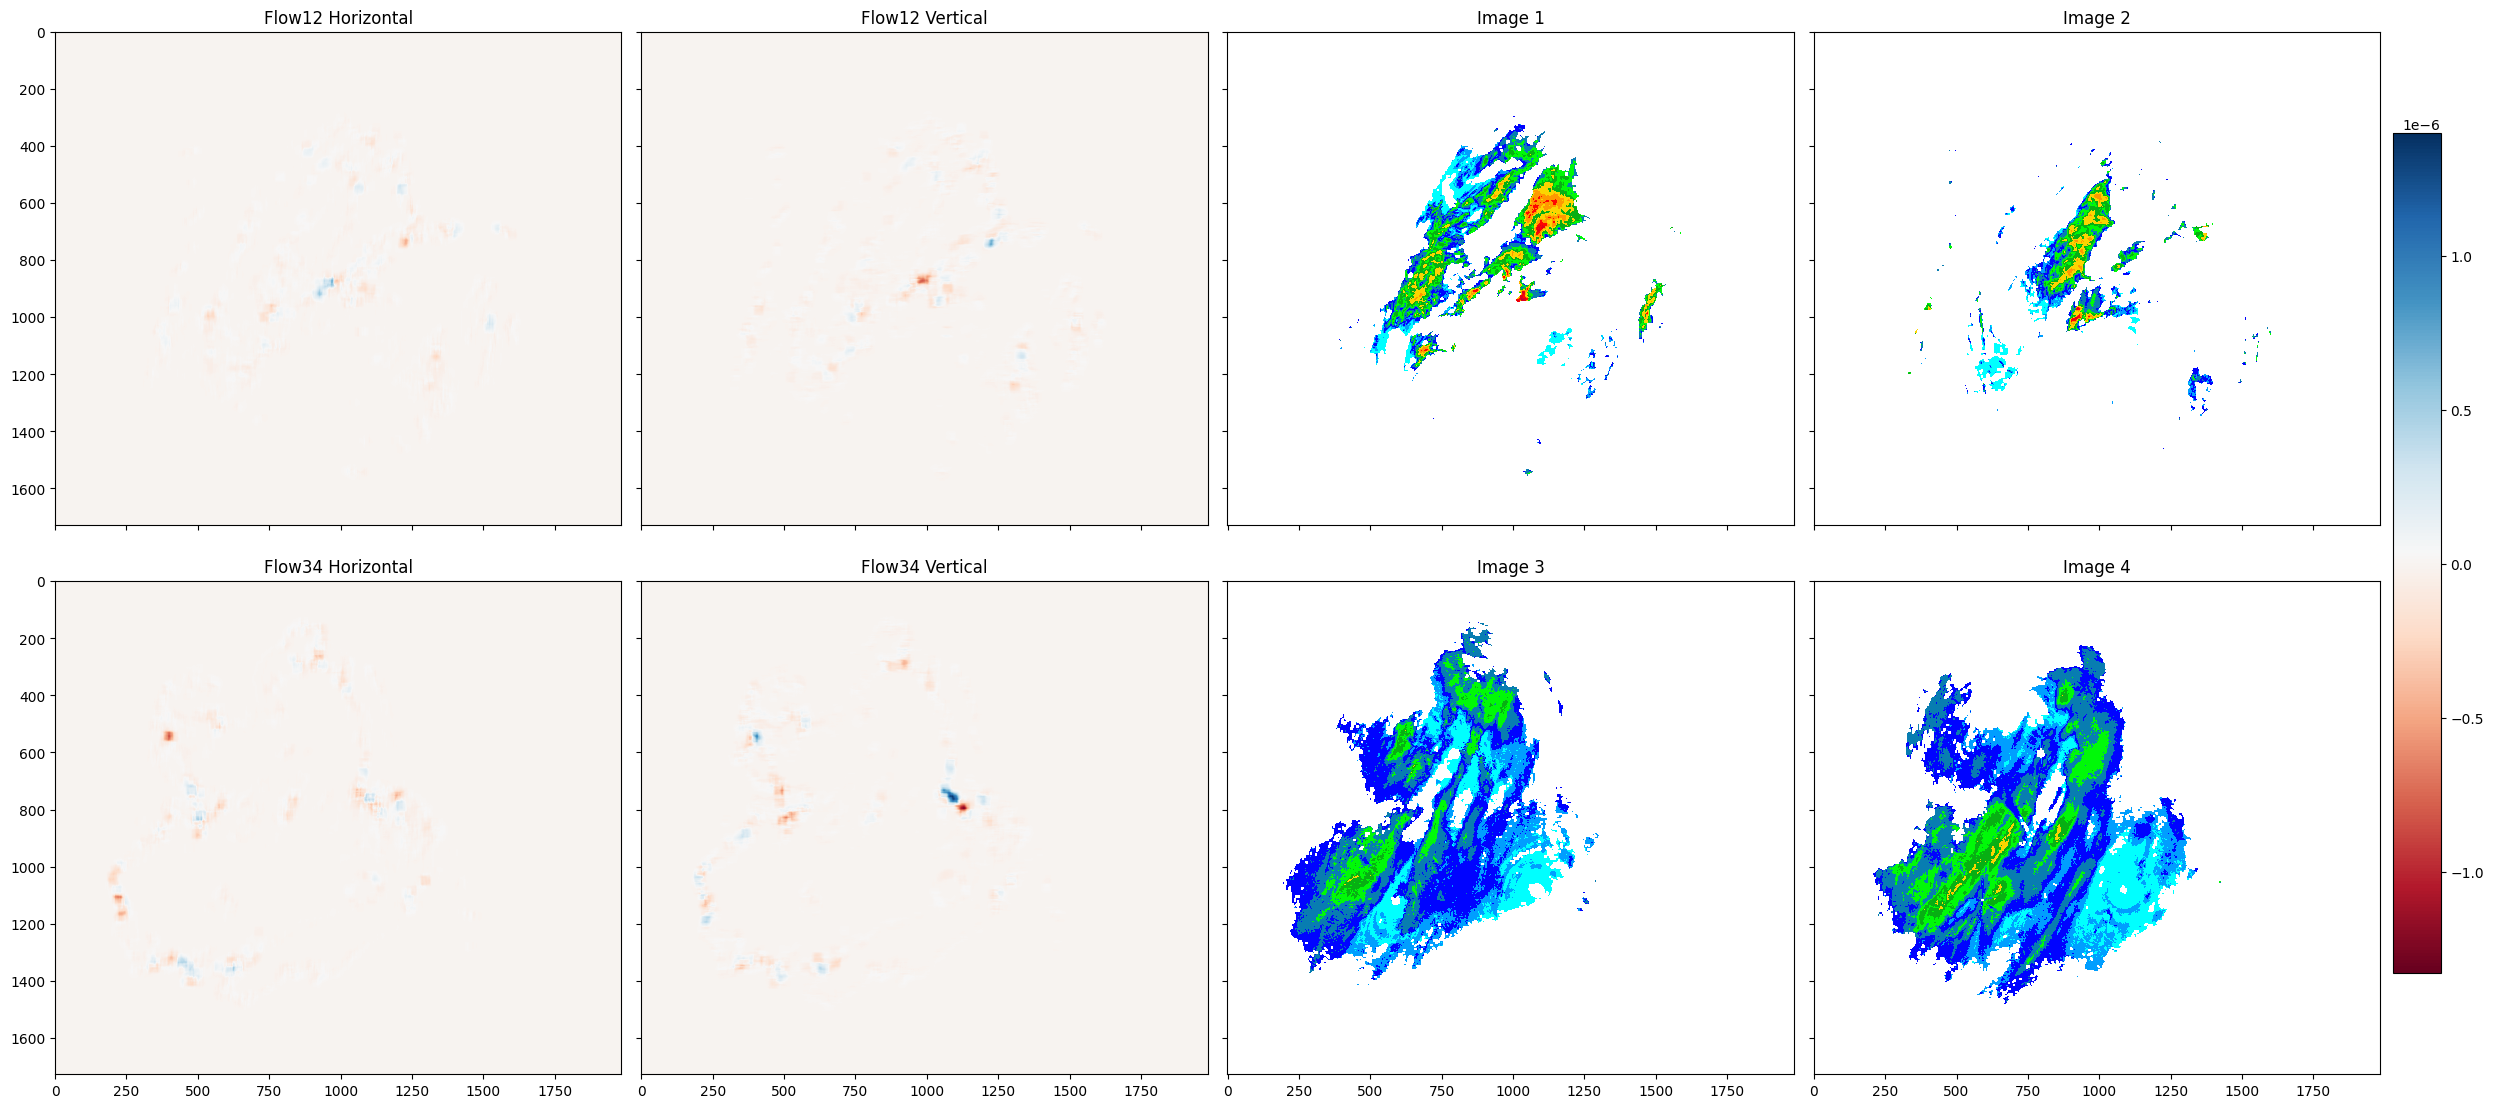

In [199]:
import cv2

# Assuming image1, image2, image3, and image4 are loaded as numpy arrays with NaN values
# Replace NaN values with zero for all images
image1[np.isnan(image1)] = 0
image2[np.isnan(image2)] = 0
image3[np.isnan(image3)] = 0
image4[np.isnan(image4)] = 0

# Convert images to float32 for optical flow calculation (normalize if needed)
image1N = np.float32(image1) / 255.0
image2N = np.float32(image2) / 255.0
image3N = np.float32(image3) / 255.0
image4N = np.float32(image4) / 255.0

# Calculate Optical Flow using Farneback's method for image1 and image2
flow12 = cv2.calcOpticalFlowFarneback(image1N, image2N, None, 0.5, 5, 35, 5, 5, 1.5, 0)
flow34 = cv2.calcOpticalFlowFarneback(image3N, image4N, None, 0.5, 5, 35, 5, 5, 1.5, 0)

flow_components = np.concatenate((flow12[..., 0], flow12[..., 1], flow34[..., 0], flow34[..., 1]))
vmin = np.min(flow_components)
vmax = np.max(flow_components)


# Define the common color map
cmap2 = 'RdBu'

# Visualization of the flow vectors
fig, axs = plt.subplots(2, 4, figsize=(24, 12))
# Flow between image1 and image2
im = axs[0, 0].imshow(flow12[..., 0], cmap=cmap2, vmin=vmin, vmax=vmax)
axs[0, 0].set_title('Flow12 Horizontal')
axs[0, 1].imshow(flow12[..., 1], cmap=cmap2, vmin=vmin, vmax=vmax)
axs[0, 1].set_title('Flow12 Vertical')

axs[1, 0].imshow(flow34[..., 0], cmap=cmap2, vmin=vmin, vmax=vmax)
axs[1, 0].set_title('Flow34 Horizontal')
axs[1, 1].imshow(flow34[..., 1], cmap=cmap2, vmin=vmin, vmax=vmax)
axs[1, 1].set_title('Flow34 Vertical')

# Optionally, visualize the original images if necessary to compare
axs[0, 2].imshow(imgC_dBZ[:,:,0], cmap=cmap, norm=norm)
axs[0, 2].set_title('Image 1')

axs[0, 3].imshow(imgC_dBZ[:,:,1], cmap=cmap, norm=norm)
axs[0, 3].set_title('Image 2')

axs[1, 2].imshow(imgS_dBZ[:,:,0], cmap=cmap, norm=norm)
axs[1, 2].set_title('Image 3')

axs[1, 3].imshow(imgS_dBZ[:,:,1], cmap=cmap, norm=norm)
axs[1, 3].set_title('Image 4')

# Remove the axis labels for clarity
for ax in axs.flat:
    ax.label_outer()

# Create an axis for the colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.999, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.tight_layout()
plt.show()

# Lag correlation

In [200]:
image1 = imgC_dBZ[:,:,0]
image2 = imgC_dBZ[:,:,1]
image3 = imgS_dBZ[:,:,0]
image4 = imgS_dBZ[:,:,1]

image1[np.isnan(image1)] = 0
image2[np.isnan(image2)] = 0
image3[np.isnan(image3)] = 0
image4[np.isnan(image4)] = 0

print('Convection cor: \t', np.corrcoef(image1.flatten(), image2.flatten())[0, 1])

print('Stratiform cor: \t', np.corrcoef(image3.flatten(), image4.flatten())[0, 1])

print('Not related cor: \t', np.corrcoef(image2.flatten(), image4.flatten())[0, 1])

Convection cor: 	 0.13924475448552373
Stratiform cor: 	 0.6531720717327208
Not related cor: 	 0.2546653119744463
